In [2]:
import sys

from Robot.joint_state import JointState
# path = '/'.join(__file__.split('/')[:-2])
# if path not in sys.path:
#     sys.path.append('/'.join(__file__.split('/')[:-2]))
    
from Plotter.plotter import Plotter
from matplotlib import pyplot as plt
from Robot.robot import Robot
from Environment.obstacle import Obstacle
from Environment.environment import Environment
from Planner.rrt_planner import RRTPlanner
import numpy as np
from Planner.data_structures import TreeNode

In [3]:
def distance(p1, p2):
        return np.linalg.norm(p2-p1)

iteration number: 0
random node:  [ 1.74676842 -2.32937978]
iteration number: 1
random node:  [ 1.84273789 -2.63020991]
iteration number: 2
random node:  [ 0.07281465 -0.7021074 ]
iteration number: 3
random node:  [-1.67074834 -0.11572363]
iteration number: 4
random node:  [1.2767401  1.96210539]
iteration number: 5
random node:  [ 2.6342803  -1.49816457]
iteration number: 6
random node:  [0.36876503 2.14690242]
iteration number: 7
random node:  [-2.38721477  1.41945662]
iteration number: 8
random node:  [0.53887727 1.28126757]
iteration number: 9
random node:  [-0.8091983  -0.50163576]
iteration number: 10
random node:  [-0.62787366  1.47140188]
iteration number: 11
random node:  [1.35285851 1.54825096]
iteration number: 12
random node:  [1.08344767 2.23578164]
iteration number: 13
random node:  [ 2.10101636 -2.91496148]
iteration number: 14
random node:  [-2.89168974  1.95774846]
iteration number: 15
random node:  [2.98887002 1.85633225]
iteration number: 16
random node:  [-1.2556544

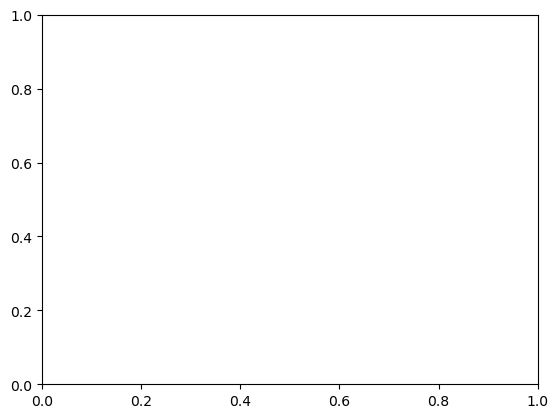

In [4]:

robot = Robot(2)
# obstacle = Obstacle(3, np.array([15,15]))
obstacle1 = Obstacle(1, np.array([5,5]))
obstacle2 = Obstacle(1, np.array([10,5]))
obstacle3 = Obstacle(1, np.array([20, 0]))
target1 = np.array([8,3])
target2 = np.array([5,8])
target3 = np.array([20,25])
environment = Environment(robot, [obstacle3], [target3])
# robot.forward_kinematics()
plotter = Plotter(environment)

# joint_states_i, joint_states_f = [JointState() for _ in range(4)], [JointState(3.14/4), JointState(3.14/4), JointState(-3.14/2), JointState()]
# plotter.generate_trajectory(joint_states_i, joint_states_f, 5, 30)

# plotter.interactive_plot()
np.random.seed(5)
rrt_planner = RRTPlanner(environment, 0.5, 3000)

tree = rrt_planner.rrt([JointState(0) for _ in range(2)])



In [5]:
plotter.rrt_plot(tree.nodes)

KeyboardInterrupt: 

In [6]:
min_length = 100000000
current_pos = rrt_planner.gripper_values[0]
for pos in rrt_planner.gripper_values:
    if distance(pos, target3) < min_length:
        min_length = distance(pos, target3)
        current_pos = pos

print("gripper pos found which is closes to goal: ", current_pos)
print("min dist to target:", min_length)
paths = rrt_planner.generate_paths()
# print(paths[0][-1].vectorized_values())
print(paths)

plotter.generate_trajectory([paths[0][0][i].joint_values for i in range(len(paths[0][0]))])

# fig,ax = plt.subplots()
# plt.plot()

gripper pos found which is closes to goal:  [16.87152635 10.54339506]
min dist to target: 14.79123976577736
[]


IndexError: list index out of range